<a href="https://colab.research.google.com/github/mikeyt06/LSTM-Stock-Price-Prediction/blob/main/AiStockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
stock_data = yf.download('DAC', start='2015-08-01', end='2025-08-01')
stock_data

/tmp/ipython-input-3049705401.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download('DAC', start='2015-08-01', end='2025-08-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,DAC,DAC,DAC,DAC,DAC
Date,,,,,
2015-08-03,71.411026,71.411026,67.391205,69.755804,1471
2015-08-04,72.593338,73.893871,70.110502,73.302723,1521
2015-08-05,72.238647,73.184491,71.529263,72.711566,721
2015-08-06,73.184486,73.893864,70.701650,72.948021,1379
2015-08-07,73.184486,74.485013,71.529258,73.184486,6007
...,...,...,...,...,...
2025-07-25,92.239998,92.440002,91.660004,92.089996,50000
2025-07-28,93.199997,93.220001,91.639999,92.239998,57200


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
scaled_data = scaler.fit_transform(stock_data["Close"].values.reshape(-1, 1))

In [ ]:
import numpy as np
def create_dataset(data, time_step):
  x, y = [], []
  for i in range(len(data) - time_step - 1):
    x.append(data[i:(i + time_step), 0])
    y.append(data[i + time_step, 0])

  return np.array(x), np.array(y)

In [ ]:
time_step = 100
x, y = create_dataset(scaled_data, time_step)

In [ ]:
train_size = 0.8
x_train, x_test = x[:int(x.shape[0]*train_size)], x[int(x.shape[0]*train_size):]
y_train, y_test = y[:int(y.shape[0]*train_size)], y[int(y.shape[0]*train_size):]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=64))
model.add(Dense(units=64))
model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 0.0560
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0027
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 0.0013
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - loss: 0.0012
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0012
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0010
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 0.0011
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 9.6389e-04
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.0012
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - loss: 9.3281e-04


In [ ]:
test_loss = model.evaluate(x_test, y_test)
print('Test Loss:', test_loss)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.4255e-04
Test Loss: 0.0012617007596418262


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [ ]:
original_data = stock_data['Close'].values.reshape(-1, 1)
predicted_data = np.empty_like(original_data)
predicted_data[:] = np.nan
predicted_data[-len(predictions):] = predictions.reshape(-1, 1)

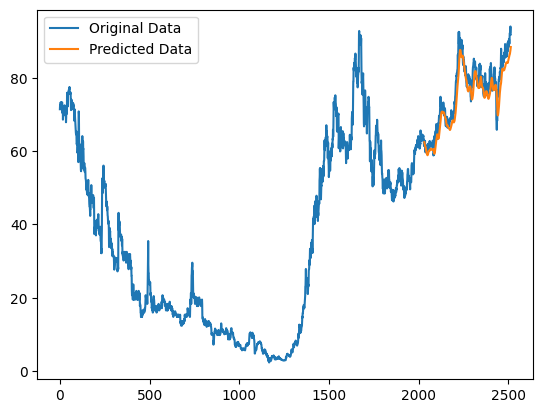

In [ ]:
import matplotlib.pyplot as plt

plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()

In [ ]:
new_predictions = model.predict(X_test[-90:])
new_predictions = scaler.inverse_transform(new_predictions)

predicted_data = np.append(predicted_data, new_predictions)
predicted_data[-90:]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([77.33789825, 77.63491821, 77.85765839, 77.99560547, 78.05606842,
       77.96154022, 77.798172  , 77.51242065, 77.27651215, 77.08267212,
       76.51927948, 75.49198914, 74.23232269, 72.74137878, 71.5803299 ,
       70.48291779, 69.81902313, 69.71903992, 69.85717773, 70.1765976 ,
       70.6366272 , 71.1085434 , 71.56195831, 72.21045685, 72.99152374,
       73.80220795, 74.54405212, 75.22934723, 75.87494659, 76.39704895,
       76.95231628, 77.45108795, 77.79608917, 78.02375793, 78.3532486 ,
       78.68888092, 79.2743988 , 80.07355499, 80.72504425, 81.25541687,
       81.73727417, 82.1687088 , 82.41594696, 82.51226807, 82.43112946,
       82.31645966, 82.20858765, 82.0721283 , 81.97602081, 81.97510529,
       82.03858185, 82.0532608 , 82.08821869, 82.19097137, 82.40156555,
       82.60100555, 82.73468781, 82.84901428, 83.0137558 , 83.36299896,
       83.58601379, 83.74993134, 83.9498291 , 84.12166595, 84.17314148,
       84.13269043, 84.13221741, 84.13633728, 84.18593597, 84.17

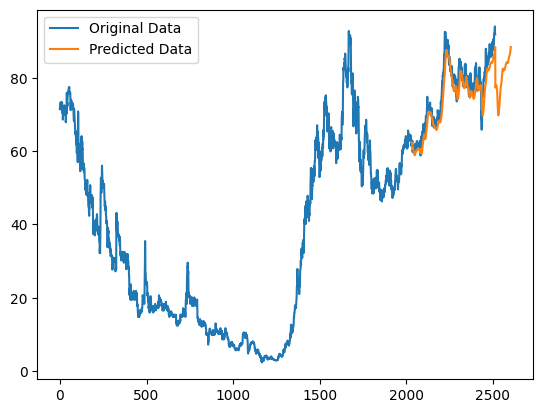

In [ ]:
plt.plot(original_data, label='Original Data')
plt.plot(predicted_data, label='Predicted Data')
plt.legend()
plt.show()